### Ali Darabi - 810100264 
### Hesam Ramezanian - 810100248 
### MohammadReze Alavi - 810100253

# Web Scraping and Introductory Data Analysis

Welcome to Homework 0, where we will delve into web scraping and perform an introductory data analysis. This homework will be a hands-on exercise that will help you become familiar with the process of extracting data from websites and conducting basic statistical analysis. 

## Objectives

By the end of this homework, you will be able to:

1. Set up a Python environment with the necessary libraries for web scraping and data analysis.
2. Write a web scraping script using Beautiful Soup and Selenium to collect data from a website.
3. Sample from the collected dataset and compare the statistics of the sample and the population.
   
## Tasks

1. **Environment Setup**: Install the required libraries such as Beautiful Soup, Selenium, pandas, numpy, matplotlib, and seaborn.

2. **Web Scraping**: Write a script to scrape transaction data from [Etherscan.io](https://etherscan.io/txs). Use Selenium to interact with the website and Beautiful Soup to parse the HTML content.

3. **Data Sampling**: Once the data is collected, create a sample from the dataset. Compare the sample statistics (mean and standard deviation) with the population statistics.


## Deliverables

1. A Jupyter notebook with all the code and explanations.
2. A detailed report on the findings, including the comparison of sample and population statistics.
Note: You can include the report in your notebook.

## Getting Started

Begin by setting up your Python environment and installing the necessary libraries. Then, proceed with the web scraping task, ensuring that you handle any potential issues such as rate limiting. Once you have the data, move on to the data sampling and statistical analysis tasks. 

Remember to document your process and findings in the Jupyter notebook, and to include visualizations where appropriate to illustrate your results. <br>
Good luck, and happy scraping!

## Data Collection (Etherscan)

In this section, we will use web scraping to gather transaction data from the Ethereum blockchain using the Etherscan block explorer. Our objective is to collect transactions from the **last 10 blocks** on Ethereum.

To accomplish this task, we will employ web scraping techniques to extract the transaction data from the Etherscan website. The URL we will be targeting for our data collection is:

[https://etherscan.io/txs](https://etherscan.io/txs)

### Steps

1. **Navigate to the URL**: Use Selenium to open the Etherscan transactions page in a browser.

2. **Locate the Transaction Data**: Identify the HTML elements that contain the transaction data for the specified block range.

3. **Extract the Data**: Write a script to extract the transaction details e.g. Hash, Method, Block, etc.

4. **Handle Pagination**: If the transactions span multiple pages, implement pagination handling to navigate through the pages and collect all relevant transaction data.

5. **Store the Data**: Save the extracted transaction data into a structured format, such as a CSV file or a pandas DataFrame, for further analysis.

### Considerations

- **Rate Limiting**: Be mindful of the website's rate limits to avoid being blocked. Implement delays between requests if necessary.
- **Dynamic Content**: The Etherscan website may load content dynamically. Ensure that Selenium waits for the necessary elements to load before attempting to scrape the data.
- **Data Cleaning**: After extraction, clean the data to remove any inconsistencies or errors that may have occurred during the scraping process.

### Resources

- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Selenium Documentation](https://selenium-python.readthedocs.io/)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Ethereum](https://ethereum.org/en/)

In [1]:
from bs4 import BeautifulSoup as bs
import requests as req
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
import time
from selenium.webdriver.common.by import By
import math
import pandas as pd
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import numpy as np
from math import sqrt
import random

In [2]:
drive = webdriver.Chrome()
drive.get("https://etherscan.io/blocks")
time.sleep(1)
lastBlock = drive.find_element(by=By.XPATH, value="//*[@id=\"content\"]/section[2]/div[2]/div[2]/table/tbody/tr[1]/td[1]/a")
lastBlockID = int(lastBlock.text)

In [3]:
blockURLs = []
for blockID in range(lastBlockID, lastBlockID-10, -1):
    blockURLs.append("https://etherscan.io/txs?block=" + str(blockID))

In [68]:
def readRow(rowIndex):
    row = {}
    xPath = "//*[@id=\"ContentPlaceHolder1_divTransactions\"]/div[2]/table/tbody/tr[" + str(rowIndex) + "]/"
    row["txnHash"] = drive.find_element(by=By.XPATH, value=xPath + "td[2]/div/span/a").text
    row["method"] = drive.find_element(by=By.XPATH, value=xPath + "td[3]/span").text
    row["block"] = drive.find_element(by=By.XPATH, value=xPath + "td[4]/a").text
    row["age"] = drive.find_element(by=By.XPATH, value=xPath + "td[6]/span").text
    row["from"] = drive.find_element(by=By.XPATH, value=xPath + "td[8]/div/a[1]").get_attribute("href").split("/")[-1]
    row["to"] = drive.find_element(by=By.XPATH, value=xPath + "td[10]/div").find_elements(by=By.CSS_SELECTOR, value="a")[-1].get_attribute("data-clipboard-text")
    row["value"] = drive.find_element(by=By.XPATH, value=xPath + "td[11]/span").text
    row["txnFee"] = drive.find_element(by=By.XPATH, value=xPath + "td[12]").text
    return row

### <span style="color:red">Explanation:</span>
<span style="color:red">
We used time.sleep(1) to avoid being blocked by the website.
</span> 

In [78]:
table = []
for blockUrl in tqdm(blockURLs, desc="Collecting Data Blocks ("):
    drive.get(blockUrl)
    tranCount = int(drive.find_element(by=By.XPATH, value="//*[@id=\"ContentPlaceHolder1_divDataInfo\"]/div/div[1]/span").text.split(" ")[3])
    pageCount = math.ceil(tranCount / 50)
    for pageIndex in range(1, pageCount + 1):
        url = blockUrl + "&p=" + str(pageIndex)
        drive.get(url)
        time.sleep(1)
        rowBound = (tranCount - (pageCount - 1) * 50 + 1) if (pageIndex == pageCount) else 51
        for rowIndex in range(1, rowBound):
            table.append(readRow(rowIndex))
    time.sleep(1)

In [72]:
dataFrame = pd.DataFrame(table)

<span style="color:red">We're creating a CSV file to use later, so we don't have to run this code again.</span>

In [74]:
#dataFrame.to_csv("DataFrame.csv", index=False)

## Data Analysis

Now that we have collected the transaction data from Etherscan, the next step is to perform conduct an initial analysis. This task will involve the following steps:

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by converting data types, removing any irrelevant information, and handling **duplicate** values.

3. **Statistical Analysis**: Calculate the mean and standard deviation of the population. Evaluate these statistics to understand the distribution of transaction values. The analysis and plotting will be on **Txn Fee** and **Value**.

4. **Visualization**: This phase involves the creation of visual representations to aid in the analysis of transaction values. The visualizations include:
    - A histogram for each data column, which provides a visual representation of the data distribution. The selection of bin size is crucial and should be based on the data's characteristics to ensure accurate representation. Provide an explanation on the bin size selection!
    - A normal distribution plot fitted alongside the histogram to compare the empirical distribution of the data with the theoretical normal distribution.
    - A box plot and a violin plot to identify outliers and provide a comprehensive view of the data's distribution.

### Deliverables

The project aims to deliver the following deliverables:

- A refined pandas DataFrame containing the transaction data, which has undergone thorough cleaning and is ready for analysis.
- A simple statistical analysis evaluating the population statistics, offering insights into the distribution of transaction values and fees.
- A set of visualizations showcasing the distribution of transaction values for the population. These visualizations include histograms, normal distribution plots, box plots, and violin plots, each serving a specific purpose in the analysis.

### Getting Started

The project starts with the importing of transaction data into a pandas DataFrame, setting the stage for data manipulation and analysis. Subsequent steps involve the cleaning of the data to ensure its quality and reliability. Followed by the calculation of population statistics. Finally, a series of visualizations are created to visually analyze the distribution of transaction values and fees.

<span style="color:red">Removing columns that we do not need to analyze from the DataFrame.</span>

In [2]:
cleanedDataFrame = pd.read_csv("DataFrame.csv")
cleanedDataFrame = cleanedDataFrame.drop(["txnHash", "method", "age", "from", "to"], axis=1)

<span style="color:red">We are changing the data type of the 'Value' and 'txnFee' columns to float.</span>

In [3]:
cleanedDataFrame["txnFee"] = cleanedDataFrame["txnFee"].apply(lambda x: float(x))
pattern = r"(\d+\.?\d*)"
cleanedDataFrame["value"] = cleanedDataFrame["value"].apply(lambda x: float(re.findall(pattern, x)[0]))

<span style="color:red">We are removing outliers by identifying and excluding data points that fall outside the range of 3 standard deviations from the mean, based on the assumption that the dataset follows a normal distribution.</span>

In [4]:
threshold = 3
columnsForProcess = ['value', 'txnFee']
outliersMask = ~((cleanedDataFrame[columnsForProcess] - cleanedDataFrame[columnsForProcess].mean()).abs() > threshold * cleanedDataFrame[columnsForProcess].std()).any(axis=1)
cleanedDataFrameWithoutOutlier = cleanedDataFrame[outliersMask]

In [5]:
valueMean = cleanedDataFrameWithoutOutlier['value'].mean() 
valueStd = cleanedDataFrameWithoutOutlier['value'].std()
feeMean = cleanedDataFrameWithoutOutlier['txnFee'].mean()
feeStd = cleanedDataFrameWithoutOutlier['txnFee'].std()
print("Value Column:")
print("Mean:", valueMean)
print("Standard Deviation:", valueStd)
print("\ntxnFee Column:")
print("Mean:", feeMean)
print("Standard Deviation:", feeStd)

Value Column:
Mean: 0.1795927629933212
Standard Deviation: 0.9397100736509802

txnFee Column:
Mean: 0.004432090516089861
Standard Deviation: 0.00818209663143524


#### <span style="color:red"> Bin Size: </span>
<span style="color:red">We are using the method of setting the bin size to the square root of the dataset size to achieve a balanced number of optimally sized bins that provide a robust and visually interpretable representation of the data distribution, while mitigating the impact of outliers.</span>

C:\Users\asus\AppData\Local\Temp\ipykernel_15072\3963746547.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleanedDataFrameWithoutOutlier["value"],bins=binValue)


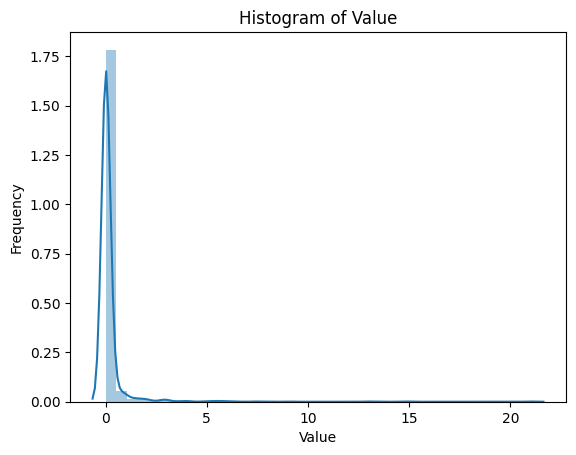

In [6]:
binValue=int(sqrt(len(cleanedDataFrameWithoutOutlier["value"]))) 
sns.distplot(cleanedDataFrameWithoutOutlier["value"],bins=binValue)
plt.title('Histogram of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<span style="color:red">Removing Transactions with zero value:</span>

In [22]:
removedZeroesDF = cleanedDataFrameWithoutOutlier["value"]
removedZeroesDF = removedZeroesDF[removedZeroesDF != 0]
removedZeroesDF = removedZeroesDF.reset_index()

C:\Users\asus\AppData\Local\Temp\ipykernel_15072\2739570579.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removedZeroesDF["value"],bins=binValue)


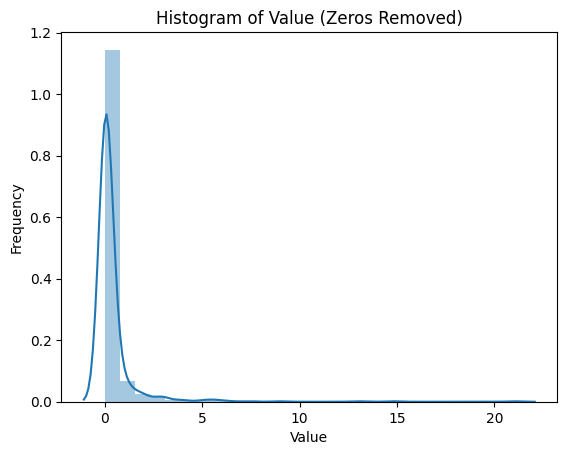

In [23]:
binValue=int(sqrt(len(removedZeroesDF["value"]))) 
sns.distplot(removedZeroesDF["value"],bins=binValue)
plt.title('Histogram of Value (Zeros Removed)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_25928\1515459474.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleanedDataFrameWithoutOutlier["txnFee"],bins=binValue)


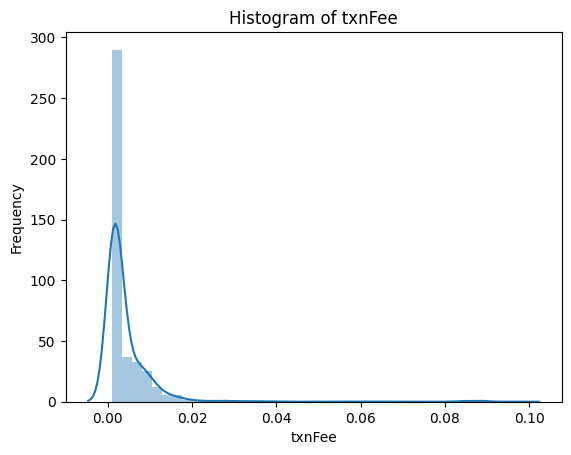

In [21]:
binValue=int(sqrt(len(cleanedDataFrameWithoutOutlier["txnFee"]))) 
sns.distplot(cleanedDataFrameWithoutOutlier["txnFee"],bins=binValue)
plt.title('Histogram of Fee')
plt.xlabel('Fee')
plt.ylabel('Frequency')
plt.show()

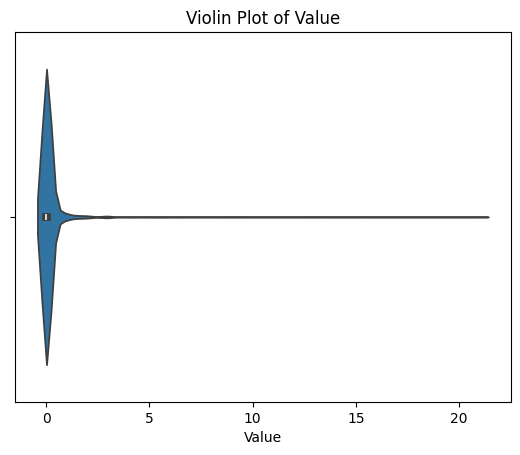

In [31]:
sns.violinplot(x=cleanedDataFrameWithoutOutlier["value"])
plt.xlabel("Value")
plt.title("Violin Plot of Value")
plt.show()

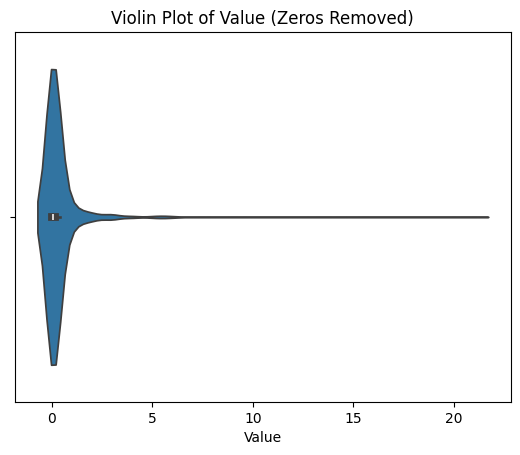

In [24]:
sns.violinplot(x=removedZeroesDF["value"])
plt.xlabel("Value")
plt.title("Violin Plot of Value (Zeros Removed)")
plt.show()

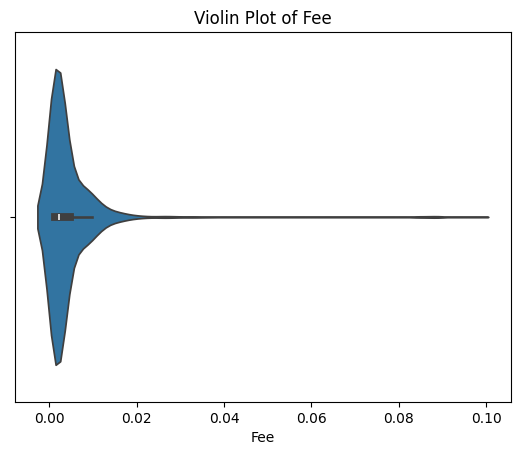

In [30]:
sns.violinplot(x=cleanedDataFrameWithoutOutlier["txnFee"])
plt.xlabel("Fee")
plt.title("Violin Plot of Fee")
plt.show()

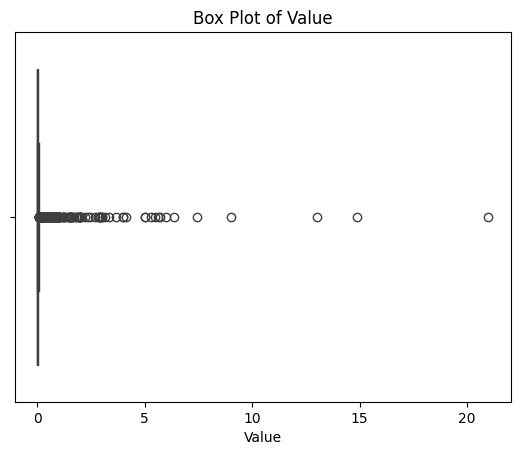

In [36]:
sns.boxplot(x=cleanedDataFrameWithoutOutlier["value"]) 
plt.xlabel("Value")
plt.title("Box Plot of Value")
plt.show()

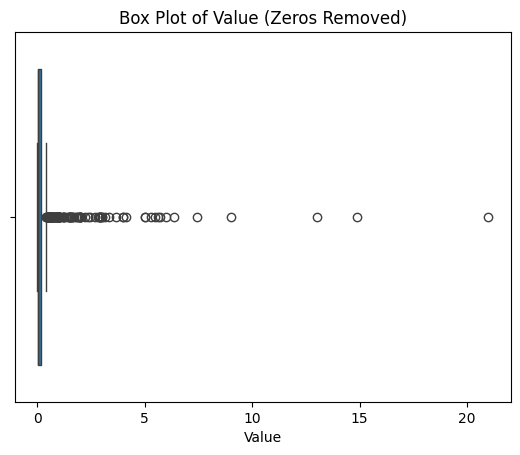

In [25]:
sns.boxplot(x=removedZeroesDF["value"]) 
plt.xlabel("Value")
plt.title("Box Plot of Value (Zeros Removed)")
plt.show()

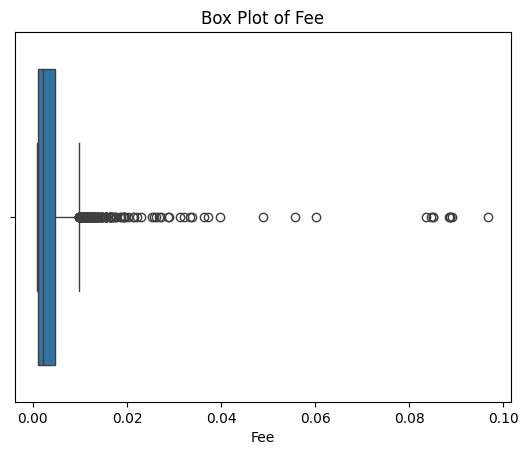

In [37]:
sns.boxplot(x=cleanedDataFrameWithoutOutlier["txnFee"]) 
plt.xlabel("Fee")
plt.title("Box Plot of Fee")
plt.show()

#### <span style="color:red">Result of Data Analysis:</span>
After removing outliers, the analysis shows that the 'Transaction Value' column has a mean of approximately 0.18 and a standard deviation of 0.94, while the 'Transaction Fee' column has a mean of around 0.004 and a standard deviation of about 0.008. Visualizations like histograms, box plots, and violin plots provide a clearer understanding of the data distributions without the distortion caused by extreme values. The box plot and violin plot, in particular, offer insights into the spread, central tendency, and potential skewness of the data. Removing outliers is crucial to focus on the primary patterns and tendencies, ensuring that the analysis and subsequent decision-making processes are based on a more representative and reliable subset of the data.

## Data Sampling and Analysis

In this section, we will delve into the process of data sampling and perform an initial analysis on the transaction data we have collected. Our objective is to understand the distribution of transaction values by sampling the data and comparing the sample statistics with the population statistics.

### Steps

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by handling missing values, converting data types, and removing any irrelevant information.

3. **Simple Random Sampling (SRS)**: Create a sample from the dataset using a simple random sampling method. This involves randomly selecting a subset of the data without regard to any specific characteristics of the data.

4. **Stratified Sampling**: Create another sample from the dataset using a stratified sampling method. This involves dividing the data into strata based on a specific characteristic (e.g., transaction value) and then randomly selecting samples from each stratum. Explain what you have stratified the data by and why you chose this column.

5. **Statistical Analysis**: Calculate the mean and standard deviation of the samples and the population. Compare these statistics to understand the distribution of transaction values.

6. **Visualization**: Plot the distribution of transaction values and fees for both the samples and the population to visually compare their distributions.

### Considerations

- **Sample Size**: The size of the sample should be large enough to represent the population accurately but not so large that it becomes impractical to analyze.
- **Sampling Method**: Choose the appropriate sampling method based on the characteristics of the data and the research question.

Explain the above considerations in your report.

#### <span style="color:red">Sample Size:</span>
Selecting a sample size of 20 percent of the overall population strikes a balance between representativeness, statistical precision, and computational efficiency. This sample size is large enough to capture the diversity and variability present in the population, reducing the risk of sampling bias. It also provides reasonably precise estimates and narrow confidence intervals while avoiding the additional resources required to analyze the entire dataset. 

In [49]:
sampleSize = int(0.8 * len(cleanedDataFrameWithoutOutlier))
randomIndices = random.sample(range(len(cleanedDataFrameWithoutOutlier)), sampleSize)
SRS = cleanedDataFrameWithoutOutlier.copy()
SRS.drop(SRS.index[randomIndices], inplace=True)
SRS = SRS.reset_index()
display(SRS)

,index,block,value,txnFee
0,3,19348164,0.000000,0.003922
1,6,19348164,0.000000,0.002507
2,12,19348164,0.000000,0.002768
3,13,19348164,0.075000,0.001135
4,15,19348164,0.000000,0.003611
...,...,...,...,...
325,1642,19348155,0.025834,0.001245
326,1645,19348155,0.081970,0.001245
327,1650,19348155,0.005844,0.001278
328,1654,19348155,0.007000,0.001449


#### <span style="color:red">Explanation:</span>
First we create a new column strata in the DataFrame, which categorizes the 'value' column into three groups (low, medium, and high) using quantiles. The q=5 means it divides the data into 5 quantile-based groups, and the labels parameter assigns the labels 'low', 'medium', and 'high' to the three groups.Then loop iterates over each stratum ('low', 'medium', and 'high') and the corresponding group of data in the DataFrame. we take a random sample from the current group (stratum) using the sample method. The frac parameter specifies the fraction of data to be sampled (0.2 or 20%), and random_state=42 ensures reproducibility of the random sampling.

In [64]:
strata = pd.qcut(cleanedDataFrameWithoutOutlier["value"], q=5, labels=['low', 'medium', 'high'], duplicates="drop")
sampleFraction = 0.2 
strataSamples = []
for stratum, group in cleanedDataFrameWithoutOutlier.groupby(strata):
    strataSample = group.sample(frac=sampleFraction, random_state=42)
    strataSamples.append(strataSample)

stratifiedSample = pd.concat(strataSamples, ignore_index=True)
display(stratifiedSample)

C:\Users\asus\AppData\Local\Temp\ipykernel_25928\333784569.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for stratum, group in cleanedDataFrameWithoutOutlier.groupby(strata):


,block,value,txnFee
0,19348162,0.000000,0.003709
1,19348162,0.000000,0.002812
2,19348160,0.000000,0.002589
3,19348162,0.000000,0.002169
4,19348164,0.000000,0.008514
...,...,...,...
325,19348160,0.167895,0.001029
326,19348160,0.600000,0.007409
327,19348158,1.719377,0.001099
328,19348163,0.280887,0.007074


In [69]:
valueMean = cleanedDataFrameWithoutOutlier['value'].mean() 
valueStd = cleanedDataFrameWithoutOutlier['value'].std()
feeMean = cleanedDataFrameWithoutOutlier['txnFee'].mean()
feeStd = cleanedDataFrameWithoutOutlier['txnFee'].std()

valueMeanSRS = SRS['value'].mean() 
valueStdSRS = SRS['value'].std()
feeMeanSRS = SRS['txnFee'].mean()
feeStdSRS = SRS['txnFee'].std()

valueMeanStratifiedSample = stratifiedSample['value'].mean() 
valueStdStratifiedSample= stratifiedSample['value'].std()
feeMeanStratifiedSample = stratifiedSample['txnFee'].mean()
feeStdStratifiedSample = stratifiedSample['txnFee'].std()

displayData = {
    'Statistic': ['Mean', 'Standard Deviation'],
    'Population - Value': [valueMean, valueStd],
    'Population - txnFee': [feeMean, feeStd],
    'SRS - Value': [valueMeanSRS, valueStdSRS],
    'SRS - txnFee': [feeMeanSRS, feeStdSRS],
    'Stratified Sample - Value': [valueMeanStratifiedSample, valueStdStratifiedSample],
    'Stratified Sample - txnFee': [feeMeanStratifiedSample, feeStdStratifiedSample]
}
displayDataDF = pd.DataFrame(displayData)
display(displayDataDF.T)

,0,1
Statistic,Mean,Standard Deviation
Population - Value,0.179593,0.93971
Population - txnFee,0.004432,0.008182
SRS - Value,0.195394,1.147705
SRS - txnFee,0.004317,0.008567
Stratified Sample - Value,0.15477,0.627765
Stratified Sample - txnFee,0.004416,0.007906


C:\Users\asus\AppData\Local\Temp\ipykernel_25928\1263212316.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(SRS["value"], bins=binValue, ax=ax1)
C:\Users\asus\AppData\Local\Temp\ipykernel_25928\1263212316.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleanedDataFrameWithoutOutlier["va

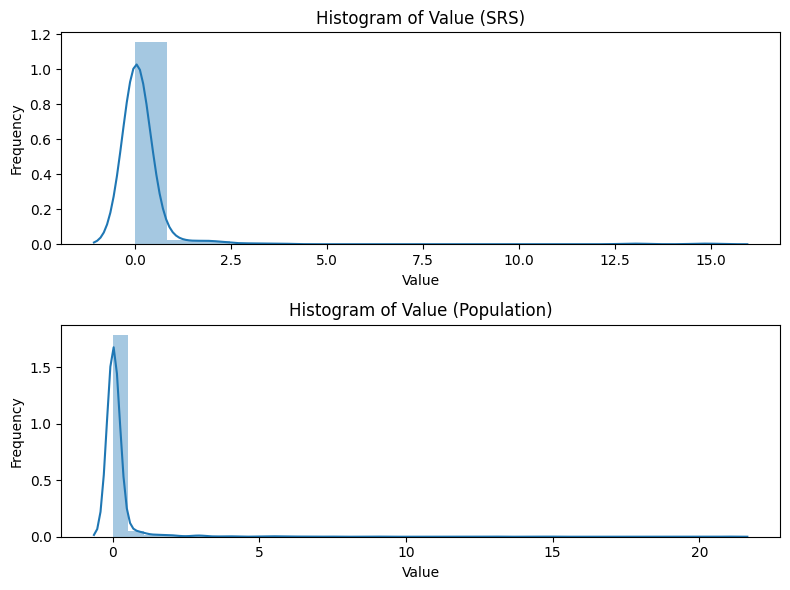

In [84]:
binValue = int(np.sqrt(len(SRS)))
binValuePopulation = int(np.sqrt(len(cleanedDataFrameWithoutOutlier)))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

sns.distplot(SRS["value"], bins=binValue, ax=ax1)
ax1.set_title('Histogram of Value (SRS)')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

sns.distplot(cleanedDataFrameWithoutOutlier["value"], bins=binValuePopulation, ax=ax2)
ax2.set_title('Histogram of Value (Population)')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
plt.tight_layout() 
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_25928\3503147765.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(SRS["txnFee"], bins=binValue, ax=ax1)
C:\Users\asus\AppData\Local\Temp\ipykernel_25928\3503147765.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleanedDataFrameWithoutOutlier["t

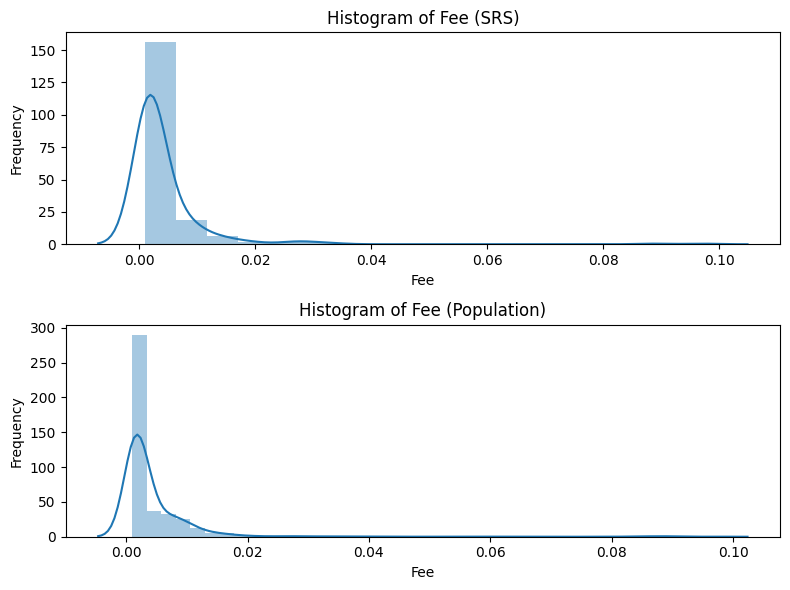

In [85]:
binValue = int(np.sqrt(len(SRS)))
binValuePopulation = int(np.sqrt(len(cleanedDataFrameWithoutOutlier)))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

sns.distplot(SRS["txnFee"], bins=binValue, ax=ax1)
ax1.set_title('Histogram of Fee (SRS)')
ax1.set_xlabel('Fee')
ax1.set_ylabel('Frequency')

sns.distplot(cleanedDataFrameWithoutOutlier["txnFee"], bins=binValuePopulation, ax=ax2)
ax2.set_title('Histogram of Fee (Population)')
ax2.set_xlabel('Fee')
ax2.set_ylabel('Frequency')
plt.tight_layout() 
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_25928\1070358050.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stratifiedSample["value"], bins=binValue, ax=ax1)
C:\Users\asus\AppData\Local\Temp\ipykernel_25928\1070358050.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleanedDataFrameWitho

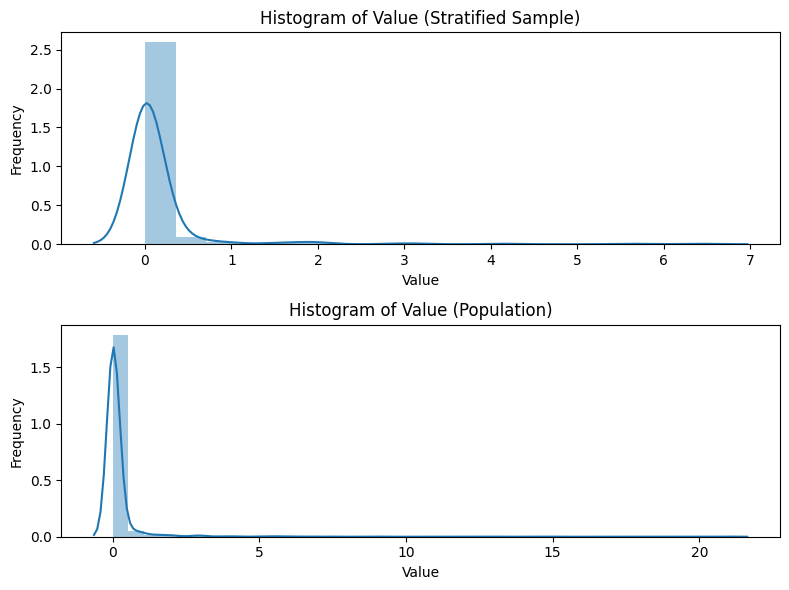

In [86]:
binValue = int(np.sqrt(len(stratifiedSample)))
binValuePopulation = int(np.sqrt(len(cleanedDataFrameWithoutOutlier)))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

sns.distplot(stratifiedSample["value"], bins=binValue, ax=ax1)
ax1.set_title('Histogram of Value (Stratified Sample)')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

sns.distplot(cleanedDataFrameWithoutOutlier["value"], bins=binValuePopulation, ax=ax2)
ax2.set_title('Histogram of Value (Population)')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
plt.tight_layout() 
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_25928\467249007.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stratifiedSample["txnFee"], bins=binValue, ax=ax1)
C:\Users\asus\AppData\Local\Temp\ipykernel_25928\467249007.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleanedDataFrameWithou

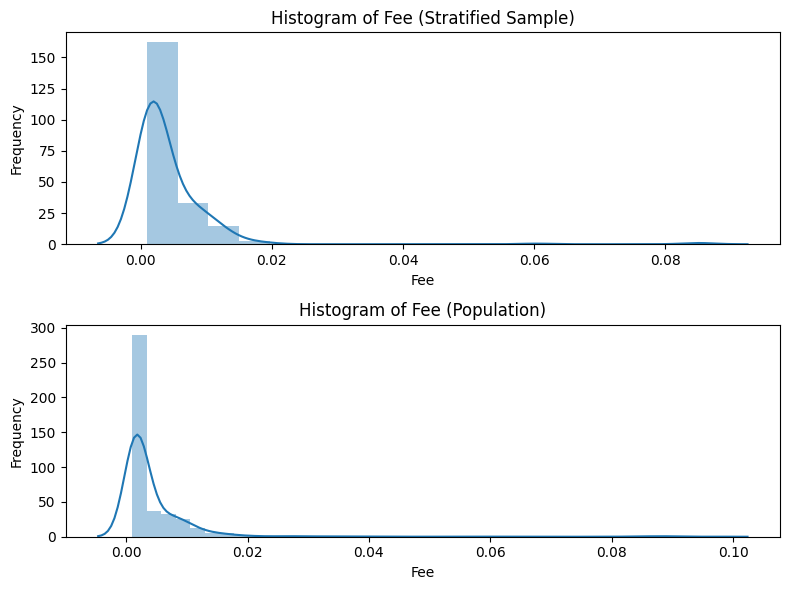

In [87]:
binValue = int(np.sqrt(len(stratifiedSample)))
binValuePopulation = int(np.sqrt(len(cleanedDataFrameWithoutOutlier)))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

sns.distplot(stratifiedSample["txnFee"], bins=binValue, ax=ax1)
ax1.set_title('Histogram of Fee (Stratified Sample)')
ax1.set_xlabel('Fee')
ax1.set_ylabel('Frequency')

sns.distplot(cleanedDataFrameWithoutOutlier["txnFee"], bins=binValuePopulation, ax=ax2)
ax2.set_title('Histogram of Fee (Population)')
ax2.set_xlabel('Fee')
ax2.set_ylabel('Frequency')
plt.tight_layout() 
plt.show()

#### <span style="color:red">Result of Sampling:</span>
The analysis compared three sampling methods - Simple Random Sampling (SRS), Stratified Sampling, and the population itself - for the 'Value' and 'Fee' columns. The Stratified Sampling method provided the most accurate representation of the population statistics, with means closer to the population means and lower standard deviations, indicating a tighter distribution around the mean. The SRS method, while unbiased, exhibited higher variability compared to the population, as evidenced by higher standard deviations. The choice of sampling method depends on factors such as population characteristics, data availability, and analysis objectives. In cases where the population exhibits distinct subgroups, Stratified Sampling can be advantageous in capturing variability while ensuring adequate representation. Overall, Stratified Sampling performed the best in representing the population statistics in this analysis.

## Questions

### 1. What are some potential limitations when using web scraping for data collection? Specifically, what problems did you face while fetching data from Etherscan? What problems can these limitations cause in your analysis?

- Legal and ethical issues: Web scraping can violate website terms of service or be considered illegal in some cases, depending on the website's policies and local laws.
- Anti-scraping measures: Many websites implement measures to detect and prevent web scraping, such as IP blocking, CAPTCHAs, or frequently changing HTML structures.
- Data quality and consistency: Web data can be unstructured, inconsistent, or contain errors, which can affect the quality and reliability of the analysis.
- Performance and scalability: Web scraping can be resource-intensive and may not scale well for large datasets or high-traffic websites.

Some common issues when scraping data from websites include:

- Handling dynamic content and JavaScript-rendered pages, which may require advanced techniques like Selenium.
- Dealing with rate limiting or IP blocking by the website if scraping too aggressively.
- Parsing and extracting the desired data accurately from the HTML structure, which may change over time.

These limitations can cause problems in the analysis, such as:

- Incomplete or biased data, leading to inaccurate or skewed results.
- Inconsistent data formats or quality, requiring extensive data cleaning and preprocessing.
- Legal or ethical concerns, potentially leading to consequences or the need to obtain proper authorization.
- Performance issues, limiting the amount of data that can be collected or the speed of the analysis.

### 2. What can make your analysis untrustworthy? What are your solutions?

Several factors can make the analysis untrustworthy:

- Data quality issues: If the collected data contains errors, inconsistencies, or is incomplete, it can lead to unreliable or biased results.
- Sampling bias: If the sampling method used to create the sample(s) is not representative of the population, the analysis may not accurately reflect the population's characteristics.
- Incorrect assumptions or methodologies: Using inappropriate statistical methods, making invalid assumptions, or failing to account for underlying data characteristics can lead to incorrect conclusions.

Potential solutions to address these issues include:

- Data cleaning and preprocessing: Thoroughly clean and preprocess the data to handle missing values, outliers, and inconsistencies, ensuring data quality and integrity.
- Validation and cross-checking: Validate the data and analysis results by cross-checking with other sources or performing additional tests to ensure accuracy and reliability.
- Robust sampling techniques: Use appropriate and robust sampling techniques, such as stratified sampling or systematic sampling, to ensure a representative sample of the population.

### 3. How did the visualization help you in understanding the data? What could you interpret from the plots?

- Identifying patterns and trends: Visualizations like histograms, scatter plots, and line charts can reveal patterns, trends, and relationships in the data that might not be immediately apparent from raw numbers.
- Detecting outliers and anomalies: Box plots, violin plots, and scatter plots can help identify outliers or anomalous data points that may require further investigation or treatment.
- Comparing distributions: Overlaying histograms with theoretical distributions (e.g., normal distribution) or comparing multiple distributions side-by-side can help assess the fit and deviations from expected distributions.
- Understanding variability and spread: Box plots, violin plots, and histograms can provide insights into the variability, spread, and skewness of the data, which can inform further analysis or modeling decisions.

Some potential interpretations could include:

- Assessing the normality of the data distributions by comparing histograms to overlaid normal distribution curves.
- Identifying any skewness or heavy tails in the distributions, which may indicate the presence of outliers or non-normal behavior.
- Detecting potential multimodality or clustering of data points, suggesting the presence of distinct subgroups or patterns within the dataset.
- Comparing the spread and variability of transaction values and fees across different samples or the population using box plots and violin plots.
- Identifying any extreme outliers or potential data quality issues by examining the whiskers or individual data points in the box and violin plots.

### 4. How do the two sampling methods differ in their output? Compare these and explain which one is a better fit to the population.

Simple random sampling (SRS) involves randomly selecting samples from the population without considering any specific characteristics or subgroups. This method ensures that each member of the population has an equal chance of being selected, and the resulting sample is representative of the overall population.

On the other hand, stratified sampling involves dividing the population into distinct, non-overlapping subgroups (strata) based on a specific characteristic (for example transaction value ranges). Samples are then randomly selected from each stratum in proportion to the stratum's size within the population. This method ensures that each subgroup is adequately represented in the sample, which can be beneficial when dealing with populations with distinct subgroups or when certain subgroups are of particular interest.

The choice between SRS and stratified sampling depends on the characteristics of the population and the objectives of the analysis. In general, stratified sampling is preferred when:

- The population consists of distinct subgroups with known characteristics (for example transaction value ranges).
- There is a need to ensure adequate representation of these subgroups in the sample.
- The analysis aims to make inferences or comparisons between these subgroups.

However, if the population is relatively homogeneous or the subgroups are not well-defined or known, SRS may be a more appropriate choice as it is simpler to implement and does not require prior knowledge of the subgroup characteristics.

In the case of the transaction data, if there are distinct subgroups based on transaction value or other relevant characteristics, stratified sampling may provide a better fit to the population by ensuring that all subgroups are adequately represented in the sample. This can lead to more accurate and representative estimates of population parameters. However, if the transaction data is relatively homogeneous or the subgroups are not well-defined, SRS may be a more appropriate choice, as it does not require prior knowledge of subgroup characteristics and can still provide a representative sample of the population.